# Regresion polinomial


Por lo anterior, ahora debemos de considerar un polinomio de segundo orden para el ajuste, entonces suponemos un modelo de la forma:


\begin{equation*}
	y = a_0 + a_1 x + a_2 x^2 + e,
\end{equation*}


por lo que, entonces buscamos de igual forma obtener el modelo mediante la minimización de los errores, salvo que, ahora es un modelo de segundo orden:
			
            
\begin{equation}
	E = \sum_{i = 1}^n e_i^2 = \sum_{i =1}^n \left( y_i - \overline{y}_i \right)^2 = \sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right)^2.
\end{equation}


Siguiendo el proceso, entonces ahora procedemos a determinar las derivadas parciales del método:


\begin{equation*}
    \begin{split}
		\frac{\partial E}{\partial a_0} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) \\
		\frac{\partial E}{\partial a_1} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) x_i \\
		\frac{\partial E}{\partial a_2} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) x^2_i \\
	\end{split}
\end{equation*}
            

Entonces al reajustar las ecuaciones para los coeficientes que determinan el modelo de regresión con un polinomio de segundo orden:


\begin{equation*}
    \begin{split}
		a_0 n + a_1 \sum_{i =1}^n x_i + a_2 \sum_{i =1} x^2_i & = \sum_{i=1} y_i \\
		a_0 \sum_{i =1}^n x_i + a_1 \sum_{i =1} x^2_i + a_2 \sum_{i =1} x^3_i & = \sum_{i=1} x_i y_i \\
		a_0 \sum_{i =1} x^2_i + a_1 \sum_{i =1}^n x^3_i + a_2 \sum_{i =1} x^4_i & = \sum_{i=1} x^2_i y_i \\
	\end{split}
\end{equation*}

In [1]:
# A fin de facilitar la carga de los datos emplearemos la libreria de pandas
import pandas as pd

# Importamos numpy en caso de ocuparlo
import numpy as np

# Importamos la función señalada del determinante
from numpy.linalg import det, solve

# Libreria para graficar
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuramos los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importamos la información mediante un archivo en csv
data = pd.read_csv('Ejemplo2.csv')

# Visualizamos la información
data

,x,y
0,0,2.1
1,1,7.7
2,2,13.6
3,3,27.2
4,4,40.9
5,5,61.1


In [3]:
# Ahora procederemos a determinar el modelo, por lo que,
# determinamos la longitud de los datos
n = len(data)

# Imprimimos el número de datos
print('Tenemos {} datos por lo que, podemos hacer una regresión hasta orden {}.'.format(n, n - 1))

Tenemos 6 datos por lo que, podemos hacer una regresión hasta orden 5.


In [4]:
# Procedemos a preguntar al usuario que orden buscamos determinar la regresión
m = int(input('¿De que orden deseas crear la regresión? \n'))

# Validamos que sea menor que n - 1
if m < n:
    print('Procedemos a crear la regresión')
    
else:
    print('No se puede construir una regresión polinomial de orden ', m)

¿De que orden deseas crear la regresión? 
2
No se puede construir una regresión polinomial de orden  2


In [5]:
# Definimos la funcion polinomial
def polinomial(data, m):
    
    # Creamos una matriz y un vector de orden m + 1
    A = np.empty((m+1, m+1))
    b = np.empty(m+1)
    
    for i in range(m+1):
        
        # Asignamos para el vector b
        b[i] = (data['x'] ** i * data['y']).sum()
        
        for j in range(i, m+1):
            
            # Calculamos la suma para la matriz del sistema
            suma = (data ** (i + j)).sum()['x']
            
            # Asignamos en ambas entradas
            A[i,j] = suma
            A[j,i] = suma
    
    # Con el sistema planteado resolvemos el mismo
    c = solve(A,b)
    
    return c

In [6]:
polinomial(data, 2)

array([2.47857143, 2.35928571, 1.86071429])

In [7]:
# Realizamos el mismo procedimiento pero de forma automática

# Creamos las variables
x = data['x'].values
y = data['y'].values

# Importamos de la libreria se scikit-learn la parte de modelos de regresion
from sklearn.linear_model import LinearRegression 

# Importamos las caracteristicas polinomiales de modelos de regresion
from sklearn.preprocessing import PolynomialFeatures 

# Asignamos el orden del polinomio
pf = PolynomialFeatures(degree = 2)

# Creamos un arreglo con 1, x, x^2
X = pf.fit_transform(x.reshape(-1,1))

# Creamos un objeto de regresión
regresion_lineal = LinearRegression()

# Ajustamos el modelo
regresion_lineal.fit(X, y) 

# Imprimimos los resultados
print('w = ' + str(regresion_lineal.coef_[1:]) + ', b = ' + str(regresion_lineal.intercept_))

w = [2.35928571 1.86071429], b = 2.4785714285714313


In [8]:
# Ahora graficaremos el modelo, por lo que, predeciremos los valores
prediccion_entrenamiento = regresion_lineal.predict(X)

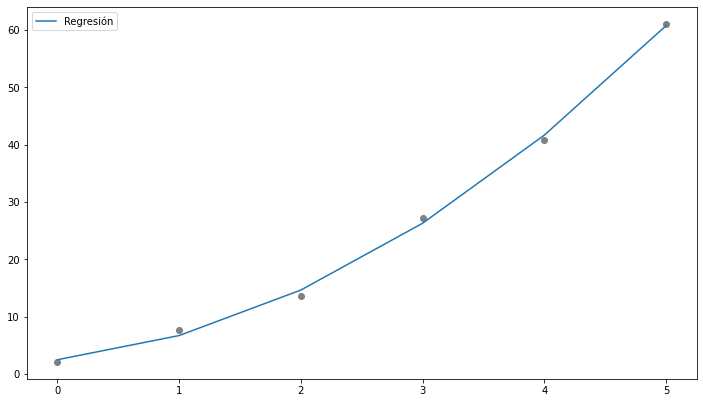

In [9]:
fig, ax = plt.subplots(figsize = (12, 6.84))
ax.scatter(data['x'], data['y'], marker = 'o', color = "gray")
ax.plot(data['x'], prediccion_entrenamiento, linestyle='-', label = "Regresión")
ax.legend();